In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

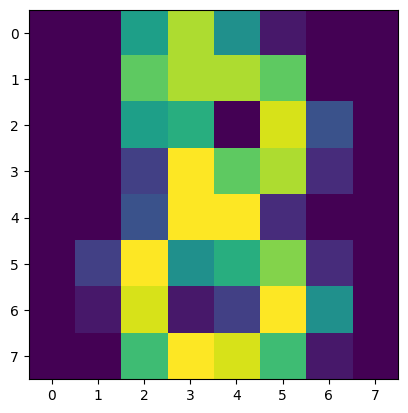

In [5]:
plt.imshow(digits.images[8])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
model.fit(X_train, y_train)

SVC()

In [11]:
model.score(X_test, y_test)

0.9833333333333333

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [14]:
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
model2.score(X_test,y_test)

0.9833333333333333

### cross_val_score

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [24]:
n_neighbors=[1,5,10,30]
leaf_size=[10,30,40,50]
avg_scores = {}

In [26]:
for n in n_neighbors:
    for l in leaf_size:
        cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=n,leaf_size=l), digits.data, digits.target, cv=5)
        avg_scores[str(n)+"_"+str(l)] = np.average(cv_scores)
avg_scores

{'1_10': np.float64(0.9643933766635715),
 '1_30': np.float64(0.9643933766635715),
 '1_40': np.float64(0.9643933766635715),
 '1_50': np.float64(0.9643933766635715),
 '5_10': np.float64(0.9627282575054161),
 '5_30': np.float64(0.9627282575054161),
 '5_40': np.float64(0.9627282575054161),
 '5_50': np.float64(0.9627282575054161),
 '10_10': np.float64(0.954942742185082),
 '10_30': np.float64(0.954942742185082),
 '10_40': np.float64(0.954942742185082),
 '10_50': np.float64(0.954942742185082),
 '30_10': np.float64(0.9410244506344785),
 '30_30': np.float64(0.9410244506344785),
 '30_40': np.float64(0.9410244506344785),
 '30_50': np.float64(0.9410244506344785)}

### GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [42]:
model3 = GridSearchCV(KNeighborsClassifier(), {
        'n_neighbors': [1,5,10,30],
        'leaf_size': [10,30,40,50],
        'algorithm': ['ball_tree','kd_tree','brute']
    }, 
    cv=5,
    return_train_score=False
)

In [43]:
model3.fit(digits.data, digits.target)
model3.cv_results_

{'mean_fit_time': array([0.0060215 , 0.00572677, 0.00569682, 0.00568824, 0.00427995,
        0.00437298, 0.00425711, 0.00425696, 0.00424767, 0.00427365,
        0.00427003, 0.00427542, 0.00360727, 0.00352492, 0.00353513,
        0.00353284, 0.00975814, 0.00976653, 0.00976648, 0.00975389,
        0.00702252, 0.00704064, 0.0070415 , 0.0070889 , 0.00717049,
        0.0072072 , 0.00719862, 0.00702829, 0.0058095 , 0.00579267,
        0.00581088, 0.00583596, 0.00062728, 0.00055661, 0.0004982 ,
        0.00067196, 0.00055566, 0.00055618, 0.00051484, 0.00062842,
        0.00061674, 0.00062895, 0.00053682, 0.00067196, 0.00059218,
        0.00053253, 0.00061078, 0.00057073]),
 'std_fit_time': array([4.07211674e-04, 3.13360025e-05, 3.24134947e-05, 2.28953350e-05,
        3.11132500e-05, 8.84521489e-05, 2.51169645e-05, 2.02950096e-05,
        2.18981981e-05, 5.81442256e-05, 4.78328281e-05, 2.47283171e-05,
        1.05555636e-04, 1.76304696e-05, 2.20624674e-05, 2.88359953e-05,
        3.10060039e-0

In [44]:
results = pd.DataFrame(model3.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006021,0.000407,0.037423,0.002984,ball_tree,10,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,1
1,0.005727,0.000031,0.037106,0.000409,ball_tree,10,5,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,13
2,0.005697,0.000032,0.037509,0.000205,ball_tree,10,10,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,25
3,0.005688,0.000023,0.039415,0.000250,ball_tree,10,30,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.925000,0.936111,0.941504,0.961003,0.944290,0.941582,0.011742,37
4,0.004280,0.000031,0.032707,0.000159,ball_tree,30,1,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,1


In [45]:
results[['param_n_neighbors','param_leaf_size','param_algorithm','mean_test_score']]

,param_n_neighbors,param_leaf_size,param_algorithm,mean_test_score
0,1,10,ball_tree,0.964393
1,5,10,ball_tree,0.962728
2,10,10,ball_tree,0.954943
3,30,10,ball_tree,0.941582
4,1,30,ball_tree,0.964393
5,5,30,ball_tree,0.962728
6,10,30,ball_tree,0.954943
7,30,30,ball_tree,0.941582
8,1,40,ball_tree,0.964393
9,5,40,ball_tree,0.962728


In [46]:
model3.best_score_

np.float64(0.9643933766635715)

In [47]:
model3.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 1}

### RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV
RandomCV = RandomizedSearchCV(KNeighborsClassifier(), {
        'n_neighbors': [3,5,7,10],
        'leaf_size': [10,30,50],
        'algorithm': ['ball_tree','kd_tree','brute']
    },
    cv=5,
    return_train_score=False,
    n_iter=5
)

In [63]:
RandomCV.fit(digits.data, digits.target)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [10, 30, 50],
                                        'n_neighbors': [3, 5, 7, 10]})

In [64]:
cv_results = pd.DataFrame(RandomCV.cv_results_)
cv_results[['param_n_neighbors','param_leaf_size','param_algorithm','mean_test_score']]

,param_n_neighbors,param_leaf_size,param_algorithm,mean_test_score
0,7,30,brute,0.959946
1,7,10,ball_tree,0.959946
2,3,10,ball_tree,0.966622
3,10,10,ball_tree,0.954943
4,5,50,ball_tree,0.962728


In [65]:
cv_results['mean_test_score'].max()

np.float64(0.966621788919839)

In [66]:
RandomCV.best_score_

np.float64(0.966621788919839)

In [67]:
RandomCV.best_params_

{'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'ball_tree'}

### So finally we got our best_parameters and best_score for KNN 